In [148]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [149]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
tips = sns.load_dataset("tips")

In [152]:
df = pd.read_csv('data.csv')
df

,GRADATION,AGGREGATE SOURCE,BINDER TYPE,DESIGN AGGREGATE GRADATION,COMPACTION,PERMANENT STRAIN (%),CTINDEX,Gmb,AV,VMA,VFB
0,19.0,17,822,5.58,35,2.362,47.675,2.353,7.243,18.011,59.787
1,19.0,17,822,5.58,50,1.976,50.025,2.375,5.982,16.897,64.597
2,19.0,17,822,5.58,75,1.644,41.935,2.425,4.003,15.148,73.576
3,19.0,17,822,5.58,90,1.161,34.315,2.439,3.449,14.658,76.475
4,19.0,17,822,5.58,110,0.958,37.280,2.442,3.262,14.493,77.492
...,...,...,...,...,...,...,...,...,...,...,...
295,26.5,24,3322,5.82,35,3.134,84.485,2.234,7.056,18.092,60.999
296,26.5,24,3322,5.82,50,2.687,61.015,2.272,5.474,16.698,67.217
297,26.5,24,3322,5.82,75,1.525,59.190,2.308,4.012,15.409,73.967
298,26.5,24,3322,5.82,90,1.299,50.840,2.318,3.573,15.023,76.214


In [153]:
df.shape

(300, 11)

In [154]:
df.sample(5)

,GRADATION,AGGREGATE SOURCE,BINDER TYPE,DESIGN AGGREGATE GRADATION,COMPACTION,PERMANENT STRAIN (%),CTINDEX,Gmb,AV,VMA,VFB
285,26.5,24,3322,4.71,35,1.369,51.835,2.260,6.829,16.143,57.695
91,19.0,24,822,5.32,50,1.529,27.520,2.284,5.573,16.477,66.182
153,26.5,17,822,5.37,90,1.106,24.260,2.454,3.358,13.709,75.512
0,19.0,17,822,5.58,35,2.362,47.675,2.353,7.243,18.011,59.787
246,26.5,24,822,5.82,50,2.727,34.690,2.264,5.431,16.823,68.481


In [155]:
X = df.iloc[:, 0:5]
y = df.iloc[:,10].values
X0= df.iloc[:,0]
X1= df.iloc[:,1]
X2= df.iloc[:,2]
X3= df.iloc

In [156]:
y

array([59.79, 64.6 , 73.58, 76.47, 77.49, 62.06, 69.31, 74.85, 75.79,
       83.04, 59.37, 63.68, 71.96, 75.04, 78.69, 59.98, 65.57, 72.55,
       75.56, 79.12, 62.45, 67.55, 74.88, 78.68, 80.47, 63.99, 67.59,
       74.28, 75.92, 86.04, 63.01, 66.11, 75.5 , 77.56, 80.86, 58.53,
       66.42, 72.16, 73.13, 79.  , 60.71, 63.92, 72.53, 78.31, 74.94,
       63.47, 70.21, 74.57, 78.09, 81.2 , 64.8 , 67.59, 77.65, 78.39,
       80.65, 63.86, 68.78, 75.17, 78.01, 78.47, 63.56, 66.45, 73.65,
       74.62, 79.74, 59.98, 69.39, 73.91, 78.53, 80.11, 64.43, 69.22,
       76.83, 78.56, 84.76, 63.1 , 66.46, 73.32, 76.2 , 80.13, 62.88,
       67.53, 74.16, 77.17, 80.71, 58.86, 64.63, 71.42, 74.35, 76.5 ,
       60.86, 66.18, 77.12, 75.91, 82.36, 63.21, 68.39, 75.52, 77.43,
       84.83, 63.28, 67.19, 74.27, 76.89, 81.99, 63.22, 68.22, 75.08,
       79.17, 84.  , 59.29, 63.3 , 72.02, 74.91, 78.85, 58.93, 67.78,
       73.28, 76.01, 75.79, 63.55, 68.8 , 75.81, 77.68, 81.25, 62.09,
       66.07, 74.96,

<Figure size 1000x1000 with 0 Axes>

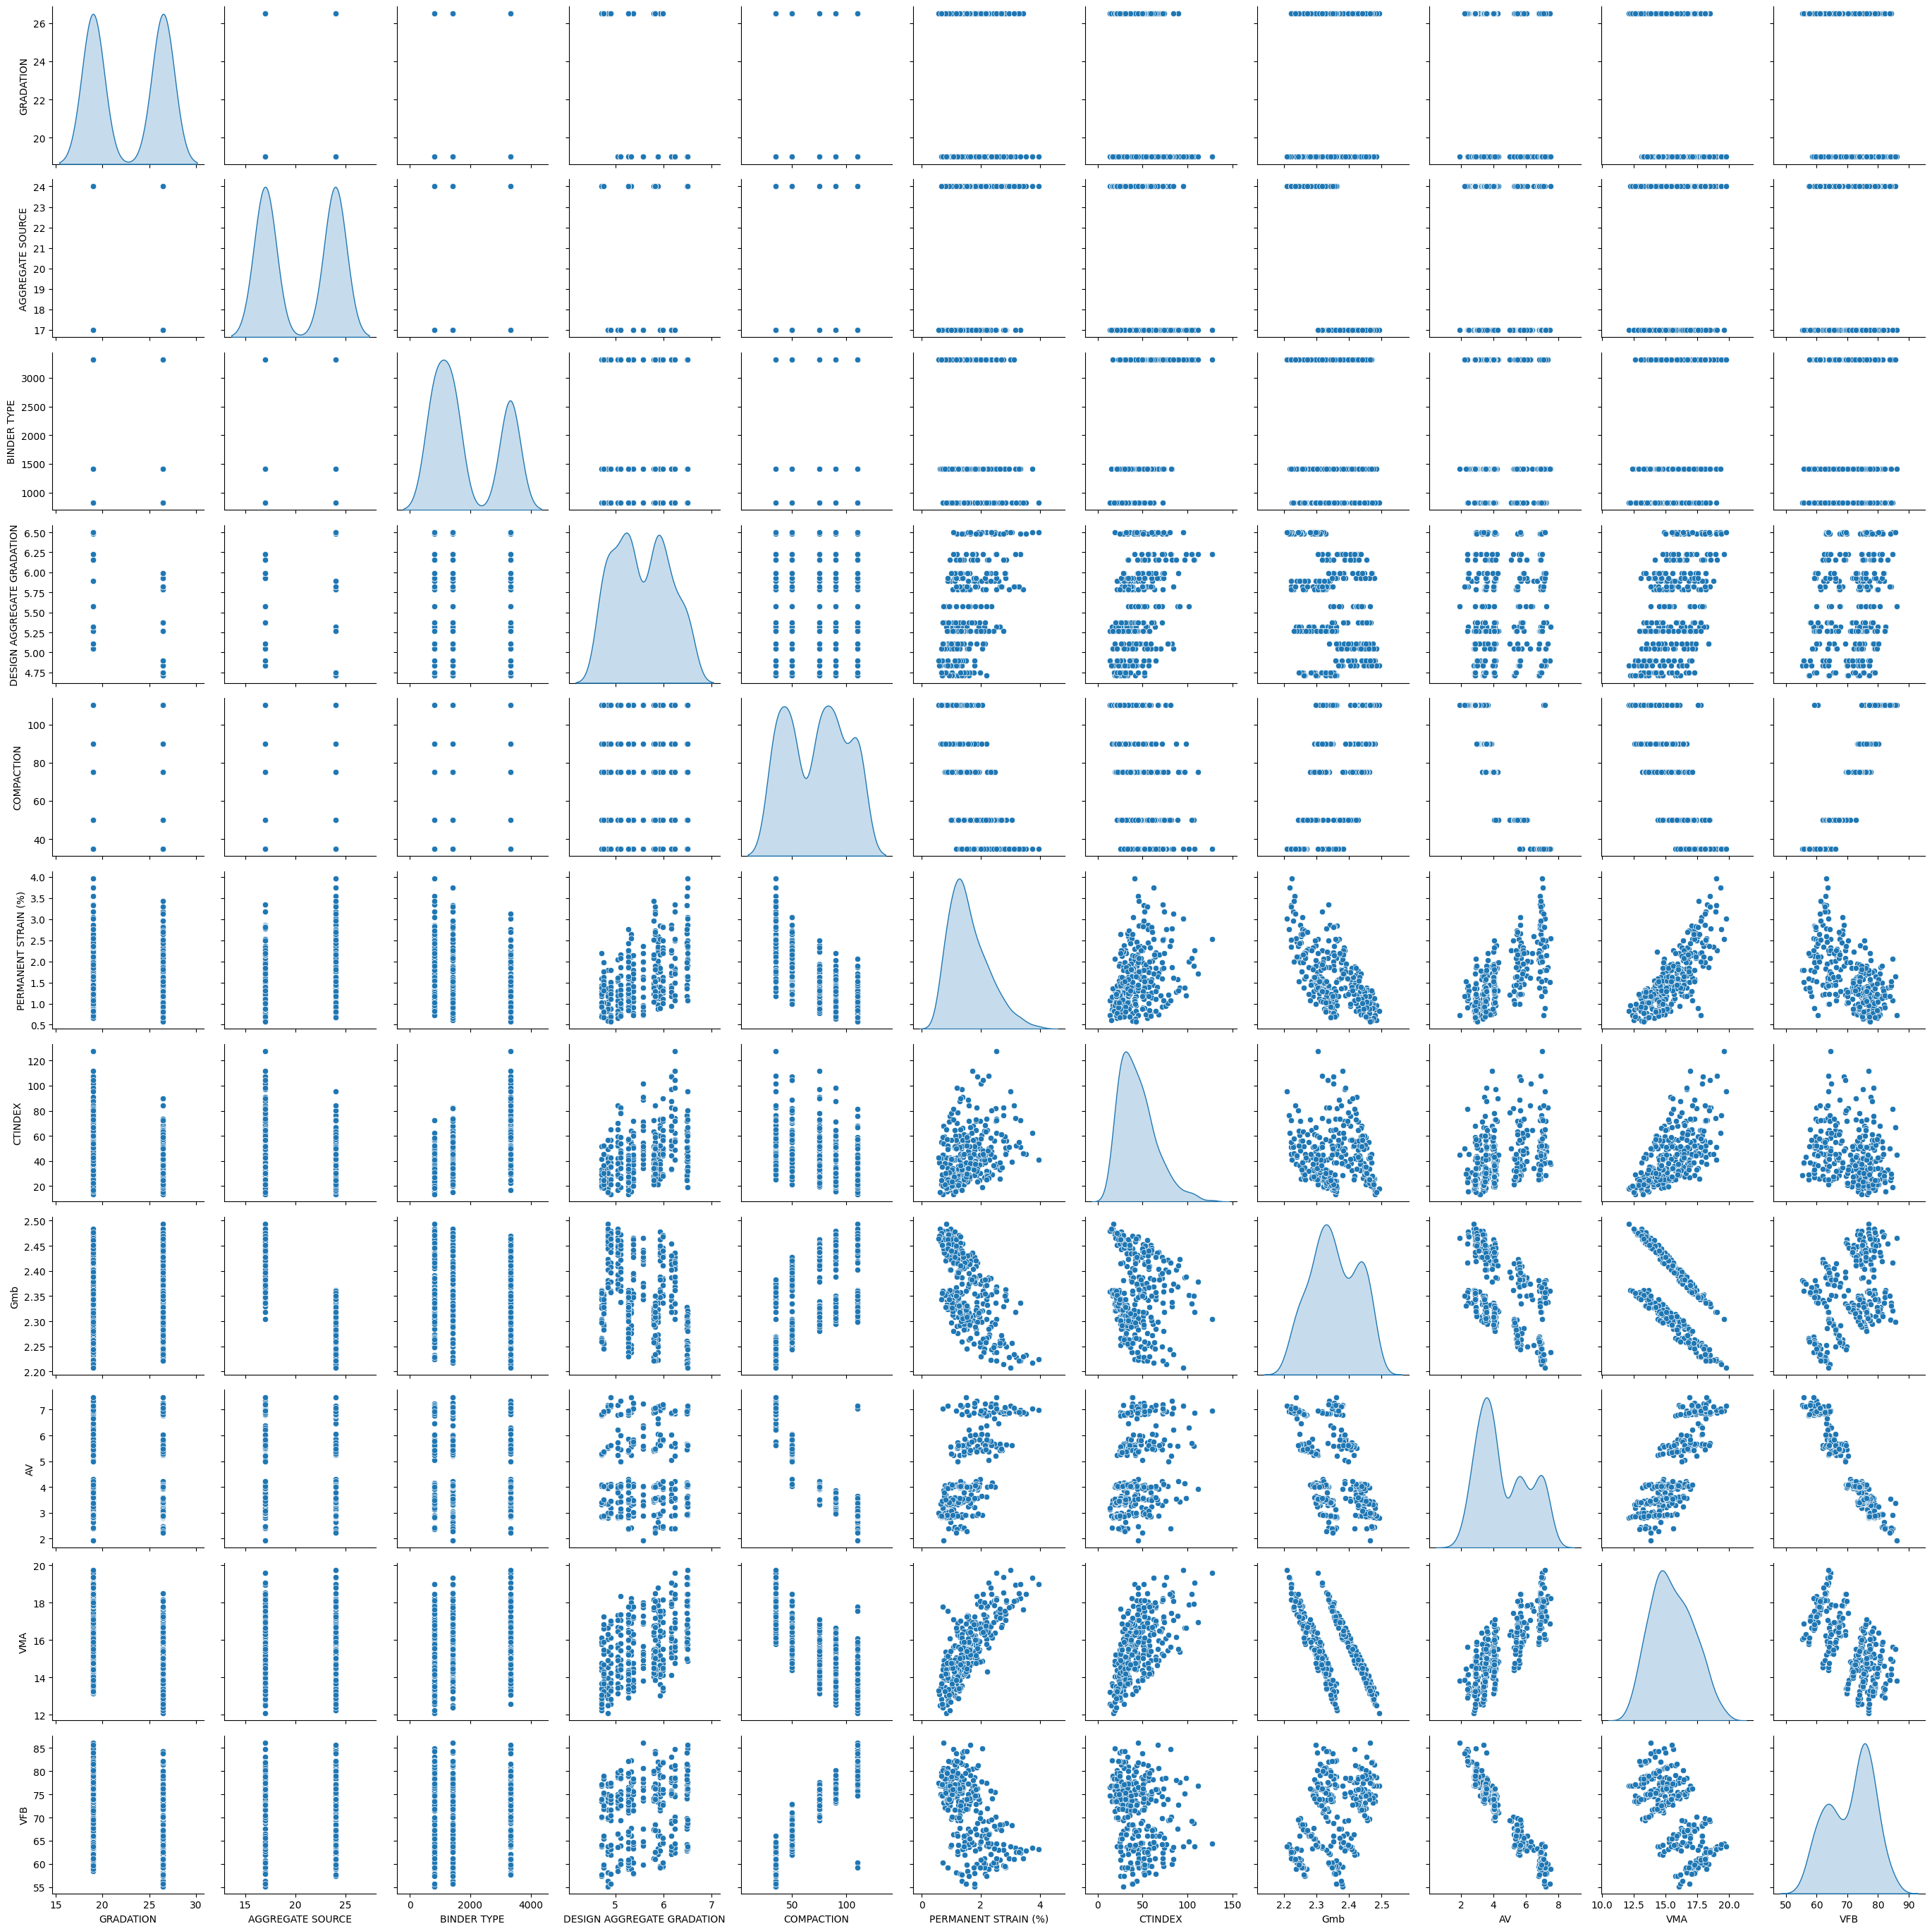

In [157]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, diag_kind='kde')
plt.tight_layout()
plt.show()

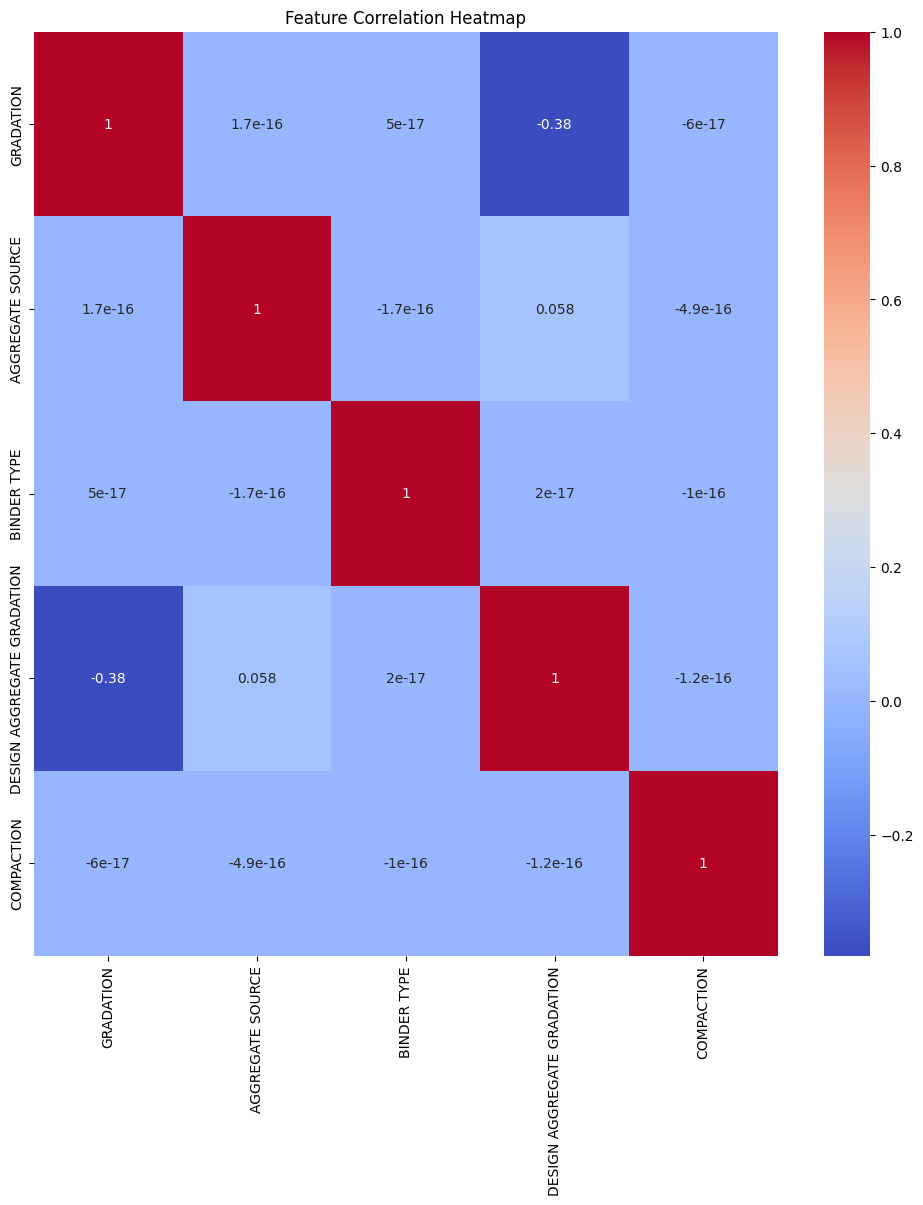

In [158]:
plt.figure(figsize=(12, 12))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [161]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [162]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2

0.9499938846973132

In [163]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores = cross_val_score(regressor, X, y, cv=5)  # cv=5 means 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")
print(f"Standard deviation of CV scores: {cv_scores.std():.2f}")

Cross-validation scores: [0.91 0.94 0.92 0.67 0.91]
Mean CV score: 0.87
Standard deviation of CV scores: 0.10


In [164]:
regressor.predict([[19.0, 17.0, 822.0, 5.58, 35.0],
[19.0, 17.0, 822.0, 5.58, 50.0],
[19.0, 17.0, 822.0, 5.58, 75.0],
[19.0, 17.0, 822.0, 5.58, 90.0],
[19.0, 17.0, 822.0, 5.58, 110.0],
[19.0, 17.0, 822.0, 6.16, 35.0],
[19.0, 17.0, 822.0, 6.16, 50.0],
[19.0, 17.0, 822.0, 6.16, 75.0],
[19.0, 17.0, 822.0, 6.16, 90.0],
[19.0, 17.0, 822.0, 6.16, 110.0],
[19.0, 17.0, 822.0, 5.05, 35.0],
[19.0, 17.0, 822.0, 5.05, 50.0],
[19.0, 17.0, 822.0, 5.05, 75.0],
[19.0, 17.0, 822.0, 5.05, 90.0],
[19.0, 17.0, 822.0, 5.05, 110.0],
[19.0, 17.0, 822.0, 5.11, 35.0],
[19.0, 17.0, 822.0, 5.11, 50.0],
[19.0, 17.0, 822.0, 5.11, 75.0],
[19.0, 17.0, 822.0, 5.11, 90.0],
[19.0, 17.0, 822.0, 5.11, 110.0],
[19.0, 17.0, 822.0, 6.23, 35.0],
[19.0, 17.0, 822.0, 6.23, 50.0],
[19.0, 17.0, 822.0, 6.23, 75.0],
[19.0, 17.0, 822.0, 6.23, 90.0],
[19.0, 17.0, 822.0, 6.23, 110.0],
[19.0, 17.0, 1415.0, 5.58, 35.0],
[19.0, 17.0, 1415.0, 5.58, 50.0],
[19.0, 17.0, 1415.0, 5.58, 75.0],
[19.0, 17.0, 1415.0, 5.58, 90.0],
[19.0, 17.0, 1415.0, 5.58, 110.0],
[19.0, 17.0, 1415.0, 6.16, 35.0],
[19.0, 17.0, 1415.0, 6.16, 50.0],
[19.0, 17.0, 1415.0, 6.16, 75.0],
[19.0, 17.0, 1415.0, 6.16, 90.0],
[19.0, 17.0, 1415.0, 6.16, 110.0],
[19.0, 17.0, 1415.0, 5.05, 35.0],
[19.0, 17.0, 1415.0, 5.05, 50.0],
[19.0, 17.0, 1415.0, 5.05, 75.0],
[19.0, 17.0, 1415.0, 5.05, 90.0],
[19.0, 17.0, 1415.0, 5.05, 110.0],
[19.0, 17.0, 1415.0, 5.11, 35.0],
[19.0, 17.0, 1415.0, 5.11, 50.0],
[19.0, 17.0, 1415.0, 5.11, 75.0],
[19.0, 17.0, 1415.0, 5.11, 90.0],
[19.0, 17.0, 1415.0, 5.11, 110.0],
[19.0, 17.0, 1415.0, 6.23, 35.0],
[19.0, 17.0, 1415.0, 6.23, 50.0],
[19.0, 17.0, 1415.0, 6.23, 75.0],
[19.0, 17.0, 1415.0, 6.23, 90.0],
[19.0, 17.0, 1415.0, 6.23, 110.0],
[19.0, 17.0, 3322.0, 5.58, 35.0],
[19.0, 17.0, 3322.0, 5.58, 50.0],
[19.0, 17.0, 3322.0, 5.58, 75.0],
[19.0, 17.0, 3322.0, 5.58, 90.0],
[19.0, 17.0, 3322.0, 5.58, 110.0],
[19.0, 17.0, 3322.0, 6.16, 35.0],
[19.0, 17.0, 3322.0, 6.16, 50.0],
[19.0, 17.0, 3322.0, 6.16, 75.0],
[19.0, 17.0, 3322.0, 6.16, 90.0],
[19.0, 17.0, 3322.0, 6.16, 110.0],
[19.0, 17.0, 3322.0, 5.05, 35.0],
[19.0, 17.0, 3322.0, 5.05, 50.0],
[19.0, 17.0, 3322.0, 5.05, 75.0],
[19.0, 17.0, 3322.0, 5.05, 90.0],
[19.0, 17.0, 3322.0, 5.05, 110.0],
[19.0, 17.0, 3322.0, 5.11, 35.0],
[19.0, 17.0, 3322.0, 5.11, 50.0],
[19.0, 17.0, 3322.0, 5.11, 75.0],
[19.0, 17.0, 3322.0, 5.11, 90.0],
[19.0, 17.0, 3322.0, 5.11, 110.0],
[19.0, 17.0, 3322.0, 6.23, 35.0],
[19.0, 17.0, 3322.0, 6.23, 50.0],
[19.0, 17.0, 3322.0, 6.23, 75.0],
[19.0, 17.0, 3322.0, 6.23, 90.0],
[19.0, 17.0, 3322.0, 6.23, 110.0],
[19.0, 24.0, 822.0, 5.89, 35.0],
[19.0, 24.0, 822.0, 5.89, 50.0],
[19.0, 24.0, 822.0, 5.89, 75.0],
[19.0, 24.0, 822.0, 5.89, 90.0],
[19.0, 24.0, 822.0, 5.89, 110.0],
[19.0, 24.0, 822.0, 6.48, 35.0],
[19.0, 24.0, 822.0, 6.48, 50.0],
[19.0, 24.0, 822.0, 6.48, 75.0],
[19.0, 24.0, 822.0, 6.48, 90.0],
[19.0, 24.0, 822.0, 6.48, 110.0],
[19.0, 24.0, 822.0, 5.27, 35.0],
[19.0, 24.0, 822.0, 5.27, 50.0],
[19.0, 24.0, 822.0, 5.27, 75.0],
[19.0, 24.0, 822.0, 5.27, 90.0],
[19.0, 24.0, 822.0, 5.27, 110.0],
[19.0, 24.0, 822.0, 5.32, 35.0],
[19.0, 24.0, 822.0, 5.32, 50.0],
[19.0, 24.0, 822.0, 5.32, 75.0],
[19.0, 24.0, 822.0, 5.32, 90.0],
[19.0, 24.0, 822.0, 5.32, 110.0],
[19.0, 24.0, 822.0, 6.50, 35.0],
[19.0, 24.0, 822.0, 6.50, 50.0],
[19.0, 24.0, 822.0, 6.50, 75.0],
[19.0, 24.0, 822.0, 6.50, 90.0],
[19.0, 24.0, 822.0, 6.50, 110.0],
[19.0, 24.0, 1415.0, 5.89, 35.0],
[19.0, 24.0, 1415.0, 5.89, 50.0],
[19.0, 24.0, 1415.0, 5.89, 75.0],
[19.0, 24.0, 1415.0, 5.89, 90.0],
[19.0, 24.0, 1415.0, 5.89, 110.0],
[19.0, 24.0, 1415.0, 6.48, 35.0],
[19.0, 24.0, 1415.0, 6.48, 50.0],
[19.0, 24.0, 1415.0, 6.48, 75.0],
[19.0, 24.0, 1415.0, 6.48, 90.0],
[19.0, 24.0, 1415.0, 6.48, 110.0],
[19.0, 24.0, 1415.0, 5.27, 35.0],
[19.0, 24.0, 1415.0, 5.27, 50.0],
[19.0, 24.0, 1415.0, 5.27, 75.0],
[19.0, 24.0, 1415.0, 5.27, 90.0],
[19.0, 24.0, 1415.0, 5.27, 110.0],
[19.0, 24.0, 1415.0, 5.32, 35.0],
[19.0, 24.0, 1415.0, 5.32, 50.0],
[19.0, 24.0, 1415.0, 5.32, 75.0],
[19.0, 24.0, 1415.0, 5.32, 90.0],
[19.0, 24.0, 1415.0, 5.32, 110.0],
[19.0, 24.0, 1415.0, 6.50, 35.0],
[19.0, 24.0, 1415.0, 6.50, 50.0],
[19.0, 24.0, 1415.0, 6.50, 75.0],
[19.0, 24.0, 1415.0, 6.50, 90.0],
[19.0, 24.0, 1415.0, 6.50, 110.0],
[19.0, 24.0, 3322.0, 5.89, 35.0],
[19.0, 24.0, 3322.0, 5.89, 50.0],
[19.0, 24.0, 3322.0, 5.89, 75.0],
[19.0, 24.0, 3322.0, 5.89, 90.0],
[19.0, 24.0, 3322.0, 5.89, 110.0],
[19.0, 24.0, 3322.0, 6.48, 35.0],
[19.0, 24.0, 3322.0, 6.48, 50.0],
[19.0, 24.0, 3322.0, 6.48, 75.0],
[19.0, 24.0, 3322.0, 6.48, 90.0],
[19.0, 24.0, 3322.0, 6.48, 110.0],
[19.0, 24.0, 3322.0, 5.27, 35.0],
[19.0, 24.0, 3322.0, 5.27, 50.0],
[19.0, 24.0, 3322.0, 5.27, 75.0],
[19.0, 24.0, 3322.0, 5.27, 90.0],
[19.0, 24.0, 3322.0, 5.27, 110.0],
[19.0, 24.0, 3322.0, 5.32, 35.0],
[19.0, 24.0, 3322.0, 5.32, 50.0],
[19.0, 24.0, 3322.0, 5.32, 75.0],
[19.0, 24.0, 3322.0, 5.32, 90.0],
[19.0, 24.0, 3322.0, 5.32, 110.0],
[19.0, 24.0, 3322.0, 6.50, 35.0],
[19.0, 24.0, 3322.0, 6.50, 50.0],
[19.0, 24.0, 3322.0, 6.50, 75.0],
[19.0, 24.0, 3322.0, 6.50, 90.0],
[19.0, 24.0, 3322.0, 6.50, 110.0],
[26.5, 17, 822, 5.37, 35],
[26.5, 17, 822, 5.37, 50],
[26.5, 17, 822, 5.37, 75],
[26.5, 17, 822, 5.37, 90],
[26.5, 17, 822, 5.37, 110],
[26.5, 17, 822, 5.93, 35],
[26.5, 17, 822, 5.93, 50],
[26.5, 17, 822, 5.93, 75],
[26.5, 17, 822, 5.93, 90],
[26.5, 17, 822, 5.93, 110],
[26.5, 17, 822, 4.84, 35],
[26.5, 17, 822, 4.84, 50],
[26.5, 17, 822, 4.84, 75],
[26.5, 17, 822, 4.84, 90],
[26.5, 17, 822, 4.84, 110],
[26.5, 17, 822, 4.9, 35],
[26.5, 17, 822, 4.9, 50],
[26.5, 17, 822, 4.9, 75],
[26.5, 17, 822, 4.9, 90],
[26.5, 17, 822, 4.9, 110],
[26.5, 17, 822, 5.99, 35],
[26.5, 17, 822, 5.99, 50],
[26.5, 17, 822, 5.99, 75],
[26.5, 17, 822, 5.99, 90],
[26.5, 17, 822, 5.99, 110],
[26.5, 17, 1415, 5.37, 35],
[26.5, 17, 1415, 5.37, 50],
[26.5, 17, 1415, 5.37, 75],
[26.5, 17, 1415, 5.37, 90],
[26.5, 17, 1415, 5.37, 110],
[26.5, 17, 1415, 5.93, 35],
[26.5, 17, 1415, 5.93, 50],
[26.5, 17, 1415, 5.93, 75],
[26.5, 17, 1415, 5.93, 90],
[26.5, 17, 1415, 5.93, 110],
[26.5, 17, 1415, 4.84, 35],
[26.5, 17, 1415, 4.84, 50],
[26.5, 17, 1415, 4.84, 75],
[26.5, 17, 1415, 4.84, 90],
[26.5, 17, 1415, 4.84, 110],
[26.5, 17, 1415, 4.9, 35],
[26.5, 17, 1415, 4.9, 50],
[26.5, 17, 1415, 4.9, 75],
[26.5, 17, 1415, 4.9, 90],
[26.5, 17, 1415, 4.9, 110],
[26.5, 17, 1415, 5.99, 35],
[26.5, 17, 1415, 5.99, 50],
[26.5, 17, 1415, 5.99, 75],
[26.5, 17, 1415, 5.99, 90],
[26.5, 17, 1415, 5.99, 110],
[26.5, 17, 3322, 5.37, 35],
[26.5, 17, 3322, 5.37, 50],
[26.5, 17, 3322, 5.37, 75],
[26.5, 17, 3322, 5.37, 90],
[26.5, 17, 3322, 5.37, 110],
[26.5, 17, 3322, 5.93, 35],
[26.5, 17, 3322, 5.93, 50],
[26.5, 17, 3322, 5.93, 75],
[26.5, 17, 3322, 5.93, 90],
[26.5, 17, 3322, 5.93, 110],
[26.5, 17, 3322, 4.84, 35],
[26.5, 17, 3322, 4.84, 50],
[26.5, 17, 3322, 4.84, 75],
[26.5, 17, 3322, 4.84, 90],
[26.5, 17, 3322, 4.84, 110],
[26.5, 17, 3322, 4.9, 35],
[26.5, 17, 3322, 4.9, 50],
[26.5, 17, 3322, 4.9, 75],
[26.5, 17, 3322, 4.9, 90],
[26.5, 17, 3322, 4.9, 110],
[26.5, 17, 3322, 5.99, 35],
[26.5, 17, 3322, 5.99, 50],
[26.5, 17, 3322, 5.99, 75],
[26.5, 17, 3322, 5.99, 90],
[26.5, 17, 3322, 5.99, 110],
[26.5, 24, 822, 5.27, 35],
[26.5, 24, 822, 5.27, 50],
[26.5, 24, 822, 5.27, 75],
[26.5, 24, 822, 5.27, 90],
[26.5, 24, 822, 5.27, 110],
[26.5, 24, 822, 5.79, 35],
[26.5, 24, 822, 5.79, 50],
[26.5, 24, 822, 5.79, 75],
[26.5, 24, 822, 5.79, 90],
[26.5, 24, 822, 5.79, 110],
[26.5, 24, 822, 4.71, 35],
[26.5, 24, 822, 4.71, 50],
[26.5, 24, 822, 4.71, 75],
[26.5, 24, 822, 4.71, 90],
[26.5, 24, 822, 4.71, 110],
[26.5, 24, 822, 4.75, 35],
[26.5, 24, 822, 4.75, 50],
[26.5, 24, 822, 4.75, 75],
[26.5, 24, 822, 4.75, 90],
[26.5, 24, 822, 4.75, 110],
[26.5, 24, 822, 5.82, 35],
[26.5, 24, 822, 5.82, 50],
[26.5, 24, 822, 5.82, 75],
[26.5, 24, 822, 5.82, 90],
[26.5, 24, 822, 5.82, 110],
[26.5, 24, 1415, 5.27, 35],
[26.5, 24, 1415, 5.27, 50],
[26.5, 24, 1415, 5.27, 75],
[26.5, 24, 1415, 5.27, 90],
[26.5, 24, 1415, 5.27, 110],
[26.5, 24, 1415, 5.79, 35],
[26.5, 24, 1415, 5.79, 50],
[26.5, 24, 1415, 5.79, 75],
[26.5, 24, 1415, 5.79, 90],
[26.5, 24, 1415, 5.79, 110],
[26.5, 24, 1415, 4.71, 35],
[26.5, 24, 1415, 4.71, 50],
[26.5, 24, 1415, 4.71, 75],
[26.5, 24, 1415, 4.71, 90],
[26.5, 24, 1415, 4.71, 110],
[26.5, 24, 1415, 4.75, 35],
[26.5, 24, 1415, 4.75, 50],
[26.5, 24, 1415, 4.75, 75],
[26.5, 24, 1415, 4.75, 90],
[26.5, 24, 1415, 4.75, 110],
[26.5, 24, 1415, 5.82, 35],
[26.5, 24, 1415, 5.82, 50],
[26.5, 24, 1415, 5.82, 75],
[26.5, 24, 1415, 5.82, 90],
[26.5, 24, 1415, 5.82, 110],
[26.5, 24, 3322, 5.27, 35],
[26.5, 24, 3322, 5.27, 50],
[26.5, 24, 3322, 5.27, 75],
[26.5, 24, 3322, 5.27, 90],
[26.5, 24, 3322, 5.27, 110],
[26.5, 24, 3322, 5.79, 35],
[26.5, 24, 3322, 5.79, 50],
[26.5, 24, 3322, 5.79, 75],
[26.5, 24, 3322, 5.79, 90],
[26.5, 24, 3322, 5.79, 110],
[26.5, 24, 3322, 4.71, 35],
[26.5, 24, 3322, 4.71, 50],
[26.5, 24, 3322, 4.71, 75],
[26.5, 24, 3322, 4.71, 90],
[26.5, 24, 3322, 4.71, 110],
[26.5, 24, 3322, 4.75, 35],
[26.5, 24, 3322, 4.75, 50],
[26.5, 24, 3322, 4.75, 75],
[26.5, 24, 3322, 4.75, 90],
[26.5, 24, 3322, 4.75, 110],
[26.5, 24, 3322, 5.82, 35],
[26.5, 24, 3322, 5.82, 50],
[26.5, 24, 3322, 5.82, 75],
[26.5, 24, 3322, 5.82, 90],
[26.5, 24, 3322, 5.82, 110]])

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([60.1 , 65.07, 73.32, 76.68, 80.45, 62.3 , 66.94, 74.28, 77.24,
       80.68, 58.08, 64.3 , 71.37, 75.01, 78.43, 58.9 , 64.87, 72.05,
       75.69, 78.43, 62.62, 67.35, 74.69, 77.99, 81.86, 61.47, 66.5 ,
       74.43, 77.67, 81.27, 62.7 , 67.4 , 74.53, 77.37, 80.65, 58.76,
       65.04, 71.79, 75.31, 78.56, 59.58, 65.61, 72.47, 76.  , 78.56,
       63.02, 67.82, 74.95, 78.12, 81.83, 63.63, 69.32, 75.71, 77.6 ,
       80.33, 64.23, 69.69, 75.65, 77.2 , 79.61, 60.9 , 67.98, 73.18,
       75.91, 78.54, 61.72, 68.55, 73.87, 76.59, 78.54, 64.6 , 70.27,
       76.23, 78.37, 81.98, 61.57, 66.01, 74.1 , 76.84, 80.43, 62.99,
       67.76, 74.93, 77.72, 82.03, 59.38, 65.76, 72.45, 75.59, 79.44,
       59.38, 65.76, 73.2 , 75.91, 79.52, 63.16, 68.03, 75.33, 77.84,
       83.45, 62.08, 66.59, 74.35, 76.98, 80.4 , 63.39, 68.23, 75.19,
       77.86, 82.  , 60.02, 66.47, 72.84, 75.86, 79.54, 60.02, 66.47,
       73.59, 76.19, 79.62, 63.5 , 68.41, 75.49, 77.89, 83.01, 62.81,
       68.24, 74.65,

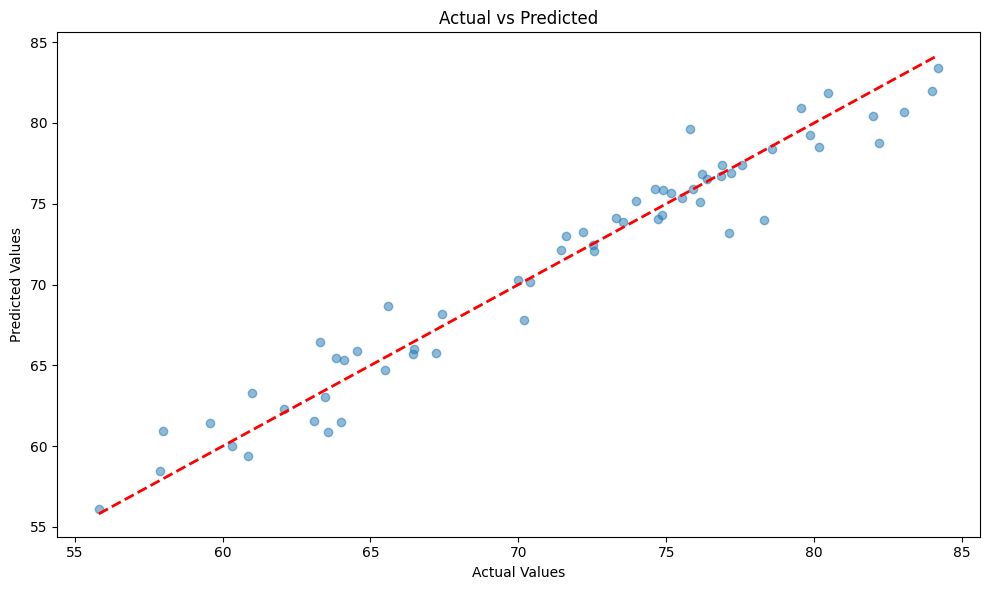

In [165]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.tight_layout()
plt.show()

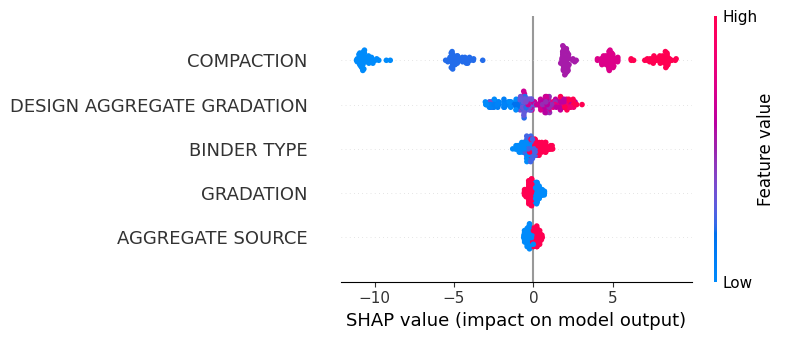

In [166]:
import shap
explainer = shap.Explainer(regressor, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
model = GradientBoostingClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)


ValueError: 
All the 1215 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1215 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py", line 665, in fit
    y = self._encode_y(y=y, sample_weight=None)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py", line 1500, in _encode_y
    check_classification_targets(y)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


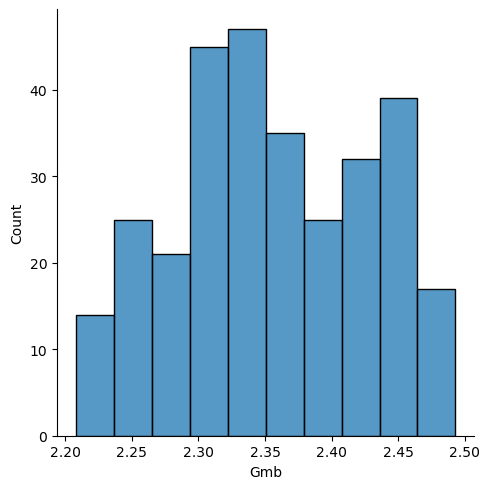

In [ ]:
sns.displot(df['Gmb'])

<Axes: xlabel='DESIGN AGGREGATE GRADATION', ylabel='Gmb'>

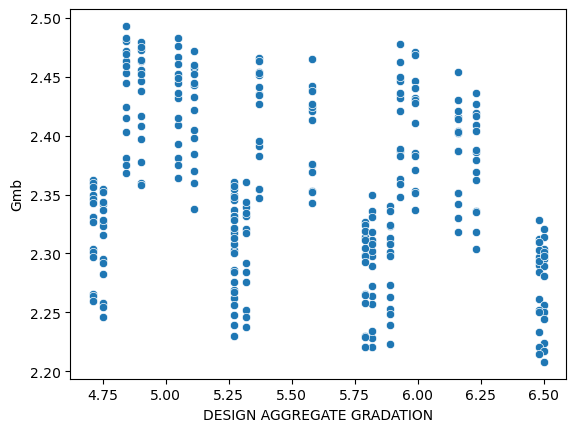

In [ ]:
sns.scatterplot(x='DESIGN AGGREGATE GRADATION', y='Gmb', data=df)

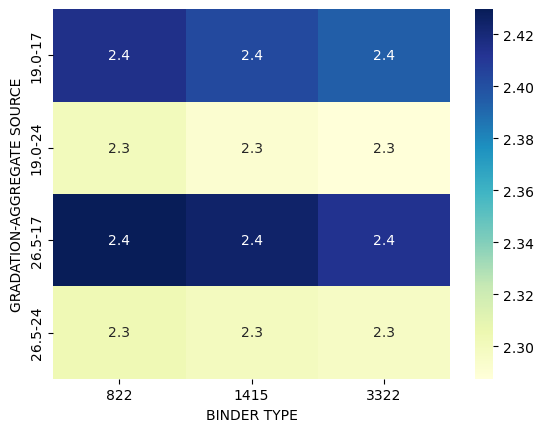

In [ ]:

pivot = df.pivot_table(index=['GRADATION', 'AGGREGATE SOURCE'], 
                       columns=['BINDER TYPE'], 
                       values='Gmb', 
                       aggfunc='mean')  # Assuming 'Gmb' is numerical

# Create a heatmap
sns.heatmap(pivot, annot=True, cmap="YlGnBu")

# Show the plot
plt.show()
